## 1. Business Understanding
1.	Bussiness Understanding
Permasalahan :
•	Khaled adalah seorang manager marketing di sebuah perusahaan online terbesar di Indonesia.       
•	Perusahaannya baru saja meluncurkan versi terbaru pembaca digital (e-Reader versi 2 ), tetapi beberapa pelanggan  tidak antusias untuk membeli produk e-Reader versi 2.                         
•	 Khaled ingin menganalisis lebih lanjut dengan menggunakan pendekatan data mining tentang   apa yang akan membuat beberapa orang termotivasi untuk membeli sebuah produk e-reader segera, selanjutnya, atau membelinya nanti.     
•	Dengan menggunakan tersebut, Khaled percaya dapat memprediksi kapan pelanggan akan siap membeli e-Reader versi terbaru sehingga banyak pelanggan yang membeli produk pembaca digital seperti versi sebelumnya (e-Reader versi  1).

Objective :
1.	Bagaimana meningkatkan pelanggan pada e-Reader pada versi terbaru?
Dengan mempertimbangkan sebuah pertanyaan di bawah ini untuk menjelajahi jalannya.     
•	Bagaimana cara menemukan pola, kapan pelanggan membeli sebuah produk e-Reader berdasarkan data terkait dengan aktivitas pelanggan pada situs online?     
Jika kita tidak bisa mengetahui pola tersebut, maka tidak banyak pelanggan yang membeli produk e-Reader versi terbaru ini dan perusahaan akan mengalami kerugian.    
Jadi, mengetahui pola ini sangat lah penting agar ketika e-Reader versi terbaru ini keluar maka pembeli antusias sehingga pelanggan meningkat.


Anggota Kelompok:
1. Muhammad Rafly Afrizal Pratama(1402020062)
2. Rogo Subandono (1402020083)
3. Muhammad Farhan Al Anzhari (1402020090)
4. Martha Riskiaty (1402020113)
5. Dian Purnama Sari (1402020088)

### Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

### Upload Files(CSV) using file library

In [2]:
from google.colab import files
uploaded = files.upload()



Saving eReaderAdoption-Training.csv to eReaderAdoption-Training.csv
Saving eReaderAdoption-Scoring.csv to eReaderAdoption-Scoring.csv


In [3]:
data_training = pd.read_csv("eReaderAdoption-Training.csv")
data_training.shape

(661, 11)

#2. Data Understanding
  Mengenali dataset serta memberikan pandangan awal terhadap data


In [4]:
data_cadangan_training = data_training.copy()
data_cadangan_training.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [5]:
data_scoring = pd.read_csv('eReaderAdoption-Scoring.csv')
data_scoring_cadangan  = data_scoring.copy()
data_scoring_cadangan.shape

(473, 10)

In [6]:
data_scoring.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account


  ### 2.1 Data Visualization
    Melakukan visualisasi terhadap features-features yang dimiliki suatu data

In [7]:
data_training["eReader_Adoption"].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: eReader_Adoption, dtype: int64

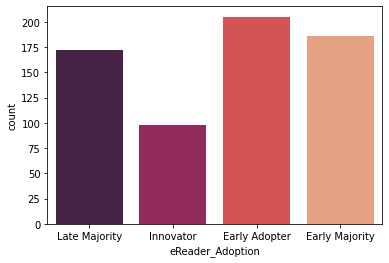

In [8]:
sns.countplot(x=data_training['eReader_Adoption'], palette = "rocket")

In [9]:
dekorelasi=data_cadangan_training.corr()
dekorelasi

,User_ID,Age
User_ID,1.000000,0.006579
Age,0.006579,1.000000


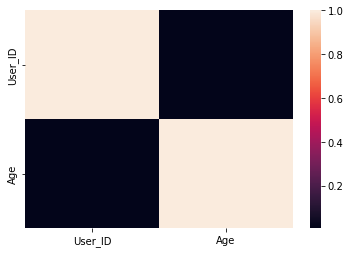

In [10]:
import seaborn as sns
sns.heatmap(dekorelasi)

In [11]:
### Check data type dari data scoring

data_scoring_cadangan.dtypes

User_ID                       int64
Gender                       object
Age                           int64
Marital_Status               object
Website_Activity             object
Browsed_Electronics_12Mo     object
Bought_Electronics_12Mo      object
Bought_Digital_Media_18Mo    object
Bought_Digital_Books         object
Payment_Method               object
dtype: object

### 2.3 Describing data
  Berisikan penjelasan mengenai suatu features pada dataset

In [12]:
data_scoring_cadangan.describe()

,User_ID,Age
count,473.000000,473.000000
mean,54647.073996,45.972516
std,25954.408115,13.385313
min,10153.000000,17.000000
25%,30952.000000,35.000000
50%,55075.000000,47.000000
75%,77373.000000,56.000000
max,99694.000000,70.000000


In [13]:
data_cadangan_training.describe()

,User_ID,Age
count,661.000000,661.000000
mean,5638.187595,42.794251
std,2635.212803,13.861983
min,1003.000000,16.000000
25%,3377.000000,32.000000
50%,5758.000000,44.000000
75%,8009.000000,55.000000
max,9982.000000,66.000000


##3. Data Preparation

### 3.1 Check Missing Values(Data Scoring)
  Melihat Apakah terdapat value yang hilang pada data scroring

In [14]:
data = pd.DataFrame(data_scoring, columns = data_scoring.columns)
dataObj = pd.DataFrame({'No': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
                      'Nama Attribute' : data_scoring.columns,
                      'Jumlah Missing Values' : data.isnull().sum()
                      })

printData = dataObj.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
printData.set_properties(**{'text-align': 'left'}).hide_index()

No,Nama Attribute,Jumlah Missing Values
1,User_ID,0
2,Gender,0
3,Age,0
4,Marital_Status,0
5,Website_Activity,0
6,Browsed_Electronics_12Mo,0
7,Bought_Electronics_12Mo,0
8,Bought_Digital_Media_18Mo,0
9,Bought_Digital_Books,0
10,Payment_Method,0


### 3.2 Check Missing Value(Data Training)
  Melihat Apakah terdapat value yang hilang pada data scroring

In [15]:
data = pd.DataFrame(data_training, columns = data_training.columns)
dataObj = pd.DataFrame({'No': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
                      'Nama Attribute' : data_training.columns,
                      'Jumlah Missing Values' : data.isnull().sum()
                      })

printData = dataObj.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
printData.set_properties(**{'text-align': 'left'}).hide_index()

No,Nama Attribute,Jumlah Missing Values
1,User_ID,0
2,Gender,0
3,Age,0
4,Marital_Status,0
5,Website_Activity,0
6,Browsed_Electronics_12Mo,0
7,Bought_Electronics_12Mo,0
8,Bought_Digital_Media_18Mo,0
9,Bought_Digital_Books,0
10,Payment_Method,0


### 3.3 Remove Outliers


In [16]:
data_training["Age"] = data_training["Age"].astype(float).astype('int64')

In [17]:
# fungsi mencari outliers
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [18]:
detect_outliers(data_training, 'Age')

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption


### 3.4 Convert data to int
 Merubah tipe data pada features menjadi numerik(ke int64) agar suatu data/features dapat dilakukan modeling 

In [19]:
change_data = {'No':0, 'Yes':1,
               'F':0, 'M':1, 'S' : 0, 
               'Innovator':0, 'Early Adopter':1 , 'Early Majority' : 2, 'Late Majority' : 3,
               'Seldom' : 0 , 'Regular':1 , 'Frequent':2
              }
change_data2 = {'No':0, 'Yes':1,
               'F':0, 'M':1, 'S' : 0, 
               'Seldom' : 0 , 'Regular':1 , 'Frequent':2
              }

data_training = data_training.replace(change_data)
data_scoring2 = data_scoring.copy().replace(change_data2)
data_training


,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,9552,1,61,1,0,1,1,1,0,Bank Transfer,3
1,6757,1,27,1,1,1,0,1,0,Bank Transfer,0
2,3599,0,29,1,0,1,1,1,1,Bank Transfer,1
3,6811,1,49,1,0,1,1,1,1,Website Account,1
4,4104,1,29,0,0,1,1,1,0,Website Account,3
...,...,...,...,...,...,...,...,...,...,...,...
656,8450,1,48,0,2,1,1,1,1,Website Account,3
657,2048,0,32,1,1,1,0,1,0,Website Account,1
658,9630,0,26,1,0,1,0,1,1,Website Account,2
659,9982,0,55,0,0,1,0,1,0,Monthly Billing,1


### 3.5 Remove Duplicate Data

In [20]:
data_training = data_training.drop_duplicates()
data_training.shape

(661, 11)

### 3.6 Features Selection(Data Training & Data Scoring)
Mempersempit features yang dibutuhkan saja. Hapus features yang tidak terlalu berpengaruh

In [21]:
X = data_training.drop(["eReader_Adoption", 'User_ID' , 'Age' , 'Gender' , 'Payment_Method'] , axis = 1)
selected_features = ['Marital_Status' , 'Website_Activity' , 'Browsed_Electronics_12Mo' , 'Bought_Electronics_12Mo' , 'Bought_Digital_Media_18Mo' , 'Bought_Digital_Books']

x2_test = data_scoring2.drop([ 'User_ID' , 'Age' , 'Gender' , 'Payment_Method'], axis = 1)
y = data_training['eReader_Adoption']


### 3.7 Normalize Data Training
 Melakukan normalisasi data

In [22]:

min_max_scaler = preprocessing.MinMaxScaler();
x_scaled = min_max_scaler.fit_transform(X)
x_scaled
normalized_data = pd.DataFrame(x_scaled, columns = selected_features)

X = normalized_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=3)

## 4. Data Modeling(Decision Tree)
    Process Modeling menggunakan Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
k_range = range(1, 100)
scores = []
for k in k_range:
  dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=101, max_features=None, min_samples_leaf=8)
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

### 4.1 Plot dari Fitting Model Menggunakan Decision Tree
    Menampilkan visualisasi dari fitting model yang dilakukan pada cell sebelumnya

Text(0, 0.5, 'Akurasi')

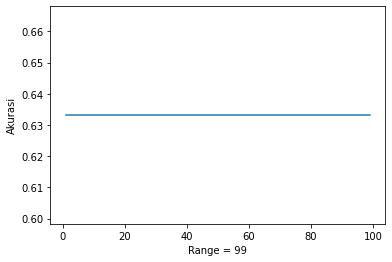

In [24]:
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Range = ' + str(k))
plt.ylabel('Akurasi')

### 4.2 Plot Tree(Decision Tree)
    Menampilkan plot dari data yang di training 

[Text(0.5, 0.875, 'X[1] <= 0.25\nentropy = 1.958\nsamples = 462\nvalue = [73, 132, 144, 113]'),
 Text(0.25, 0.625, 'X[5] <= 0.5\nentropy = 1.769\nsamples = 296\nvalue = [15, 69, 106, 106]'),
 Text(0.125, 0.375, 'X[3] <= 0.5\nentropy = 1.266\nsamples = 154\nvalue = [5, 4, 52, 93]'),
 Text(0.0625, 0.125, 'entropy = 1.389\nsamples = 79\nvalue = [3, 4, 27, 45]'),
 Text(0.1875, 0.125, 'entropy = 1.08\nsamples = 75\nvalue = [2, 0, 25, 48]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\nentropy = 1.632\nsamples = 142\nvalue = [10, 65, 54, 13]'),
 Text(0.3125, 0.125, 'entropy = 1.523\nsamples = 19\nvalue = [2, 12, 3, 2]'),
 Text(0.4375, 0.125, 'entropy = 1.618\nsamples = 123\nvalue = [8, 53, 51, 11]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\nentropy = 1.74\nsamples = 166\nvalue = [58, 63, 38, 7]'),
 Text(0.625, 0.375, 'X[2] <= 0.5\nentropy = 1.703\nsamples = 99\nvalue = [21, 44, 30, 4]'),
 Text(0.5625, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [0, 3, 5, 0]'),
 Text(0.6875, 0.125, 'entropy = 1.717\nsamples =

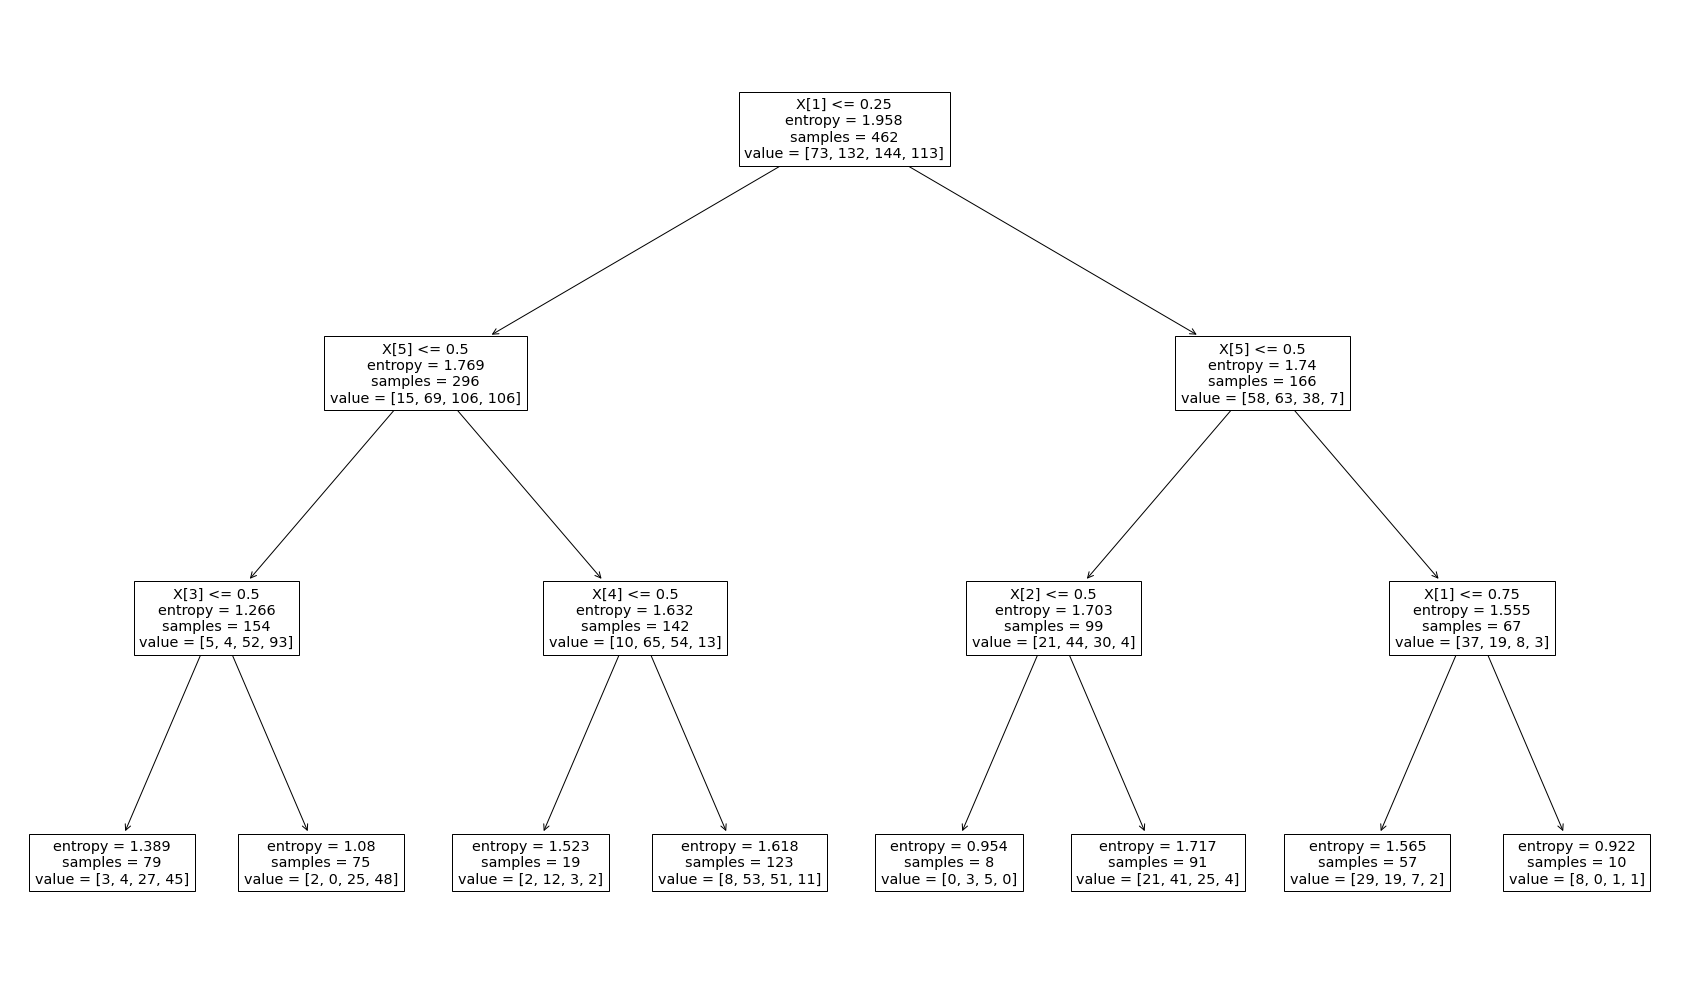

In [25]:
plt.figure(figsize=(30,18))

from sklearn import tree

tree.plot_tree(dtree.fit(X_train, y_train)) 

[Text(0.5, 0.875, 'X[5] <= 0.5\nentropy = 1.9\nsamples = 199\nvalue = [25, 73, 42, 59]'),
 Text(0.25, 0.625, 'X[1] <= 0.25\nentropy = 1.672\nsamples = 111\nvalue = [6, 27, 21, 57]'),
 Text(0.125, 0.375, 'X[3] <= 0.5\nentropy = 1.079\nsamples = 71\nvalue = [0, 6, 13, 52]'),
 Text(0.0625, 0.125, 'entropy = 1.059\nsamples = 36\nvalue = [0, 5, 4, 27]'),
 Text(0.1875, 0.125, 'entropy = 0.997\nsamples = 35\nvalue = [0, 1, 9, 25]'),
 Text(0.375, 0.375, 'X[1] <= 0.75\nentropy = 1.738\nsamples = 40\nvalue = [6, 21, 8, 5]'),
 Text(0.3125, 0.125, 'entropy = 1.728\nsamples = 31\nvalue = [3, 16, 7, 5]'),
 Text(0.4375, 0.125, 'entropy = 1.352\nsamples = 9\nvalue = [3, 5, 1, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.25\nentropy = 1.584\nsamples = 88\nvalue = [19, 46, 21, 2]'),
 Text(0.625, 0.375, 'X[0] <= 0.5\nentropy = 1.216\nsamples = 57\nvalue = [2, 36, 18, 1]'),
 Text(0.5625, 0.125, 'entropy = 0.964\nsamples = 21\nvalue = [0, 16, 4, 1]'),
 Text(0.6875, 0.125, 'entropy = 1.233\nsamples = 36\nvalue = [2,

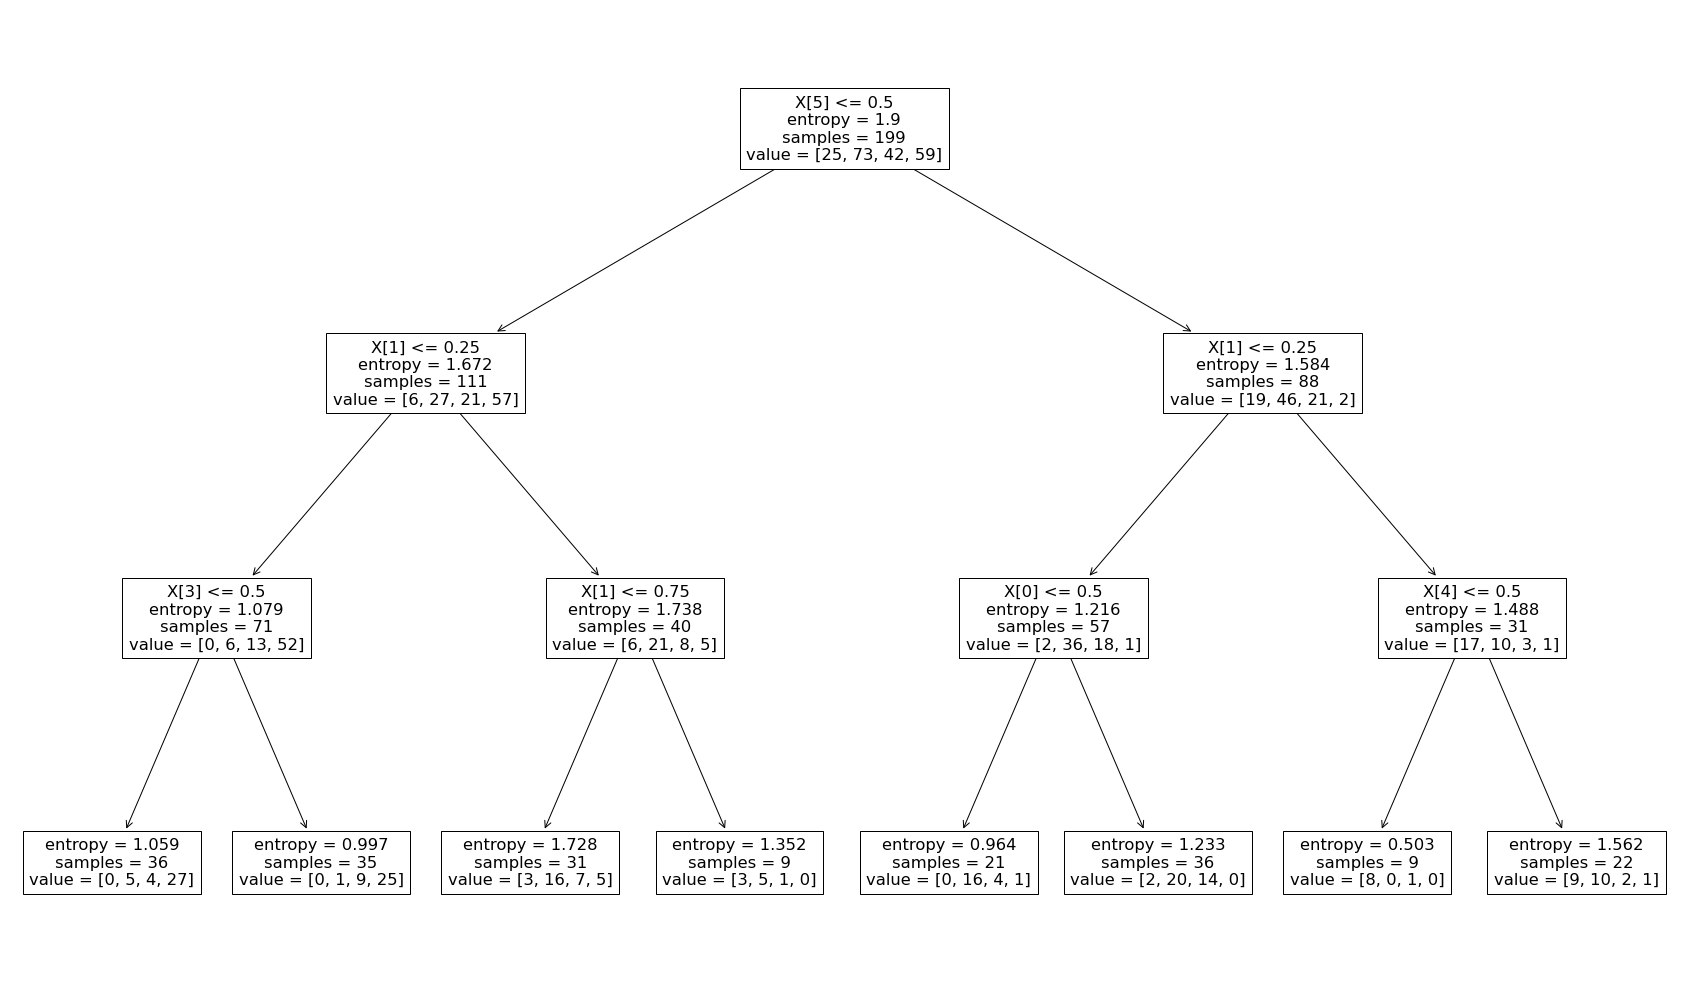

In [26]:
plt.figure(figsize=(30,18))

from sklearn import tree

tree.plot_tree(dtree.fit(X_test, y_test)) 

## 5. Data Evaluation(Decision Tree)
 Melakukan evaluasi pada suatu dataset(training) berdasarkan hasil modeling sebelumnya menggunakan decision tree


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'mic

Accuracy Score Decision Tree = 0.64
Precision =  0.638
Recall =  0.546
F1 =  0.638
Root Mean Squared Error (RMSE) = 0.7568780097268253
Pearson's Correlation Coefficient = 0.7258106062738773


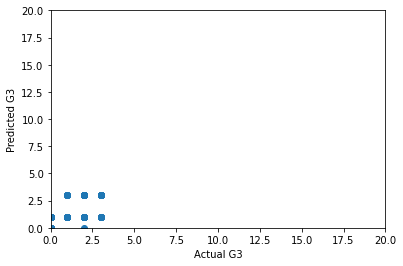

In [27]:
    y_pred = dtree.predict(X_test)
    y_pred
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_pred, y_test, pos_label='positive' ,average='micro')
    recall = recall_score(y_pred, y_test ,pos_label='positive' , average='macro')
    f1 = f1_score(y_pred, y_test,  pos_label='positive',average='micro')     
    print("Accuracy Score Decision Tree =", accuracy.round(2))
    print("Precision = ", precision.round(3))
    print("Recall = ", recall.round(3))
    print("F1 = ", f1.round(3))    
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_pred, y_test)
    print("==========")
    print("Root Mean Squared Error (RMSE) = " + str(rmse))
    print("Pearson's Correlation Coefficient = " + str(r))    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual G3")
    plt.ylabel("Predicted G3")
    plt.axis([0, 20, 0, 20])
    plt.show()

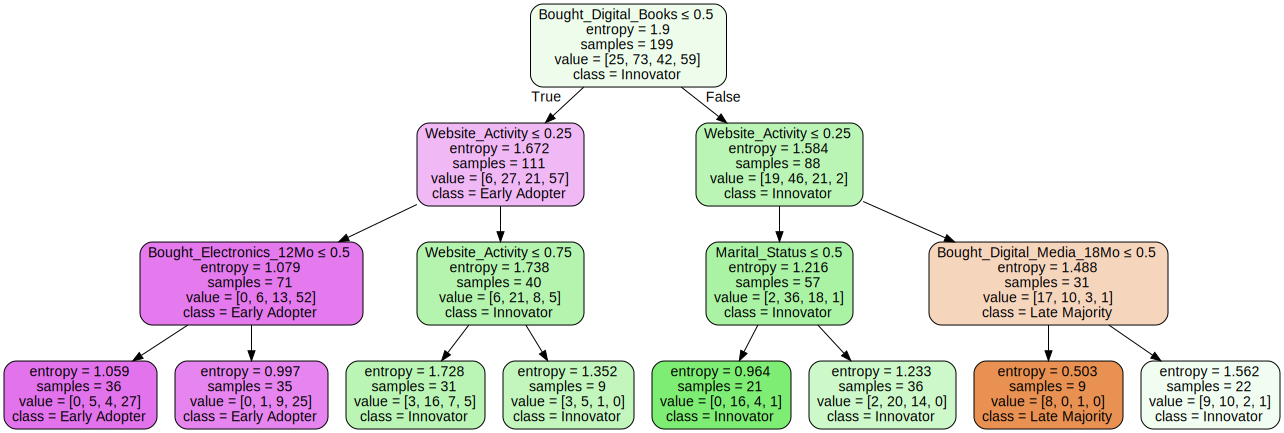

In [28]:
import graphviz 
graf = tree.export_graphviz(dtree, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=data_cadangan_training["eReader_Adoption"],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(graf) 

graph 

### 5.2 Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 8 17  0  0]
 [ 0 67  0  6]
 [ 1 28  0 13]
 [ 0  7  0 52]]


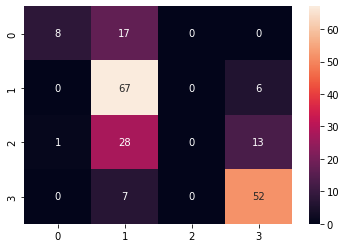

In [30]:
sns.heatmap(cm, annot=True)

### Hasil Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.32      0.47        25
           1       0.56      0.92      0.70        73
           2       0.00      0.00      0.00        42
           3       0.73      0.88      0.80        59

    accuracy                           0.64       199
   macro avg       0.55      0.53      0.49       199
weighted avg       0.54      0.64      0.55       199



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.4 Predict Data scoring based on Data training 

In [32]:
    y_pred2 = dtree.predict(x2_test)
    data_scoring['eReader_Adoption'] = y_pred2.copy()

## 5.5 Showing Data Scoring with Prediction(FINAL PREDICT)

In [33]:
change_data3 = {0: 'Innovator', 1: 'Early Adopter' , 2:'Early Majority' , 3: 'Late Majority'
              }

data_scoring = data_scoring.copy().replace(change_data3)
data_scoring.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer,Early Adopter
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card,Early Adopter
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account,Late Majority


### EXTRA: Menggunakan Algoritma yang lain

1. SGD(Stochastic Gradient Descent)

In [34]:
from sklearn.linear_model import SGDClassifier
def stochasticGradientDescent(df):
    sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    y_pred
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_pred, y_test, pos_label='positive' ,average='micro')
    recall = recall_score(y_pred, y_test ,pos_label='positive' , average='macro')
    f1 = f1_score(y_pred, y_test,  pos_label='positive',average='micro')   
    print("Accuracy Score Stochastic Gradient Descent =", accuracy.round(2))
    print("Precision = ", precision.round(3))
    print("Recall = ", recall.round(3))
    print("F1 = ", f1.round(3))
    
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_pred, y_test)
    print("==========")
    print("Root Mean Squared Error (RMSE) = " + str(rmse))
    print("Pearson's Correlation Coefficient = " + str(r))    

stochasticGradientDescent(data_training)    

Accuracy Score Stochastic Gradient Descent = 0.54
Precision =  0.538
Recall =  0.382
F1 =  0.538
Root Mean Squared Error (RMSE) = 0.8113516237035778
Pearson's Correlation Coefficient = 0.645515910172879


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'mic

### Hasil: Meskipun sudah mengganti dengan algoritma yang lain, Accuracy score pun tidak menunjukan perubahan

## Model Evaluation Using K-Fold-Decision Tree

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf
results = []

for train_index, test_index in kf.split(X_train):
    train_set = (X_train.iloc[train_index, :], y_train.iloc[train_index])
    test_set = (X_train.iloc[test_index, :], y_train.iloc[test_index])
    
    dtree = DecisionTreeClassifier(max_depth=3, random_state=101,
                                   max_features=None, min_samples_leaf=8
                                  )
    dtree.fit(train_set[0], train_set[1])
    results.append(dtree.score(test_set[0], test_set[1]))

print("K-Fold Accuracies: ")    
for i , result in enumerate(results):
    print("Interation",i + 1,":", result.round(2))

K-Fold Accuracies: 
Interation 1 : 0.48
Interation 2 : 0.45
Interation 3 : 0.51
Interation 4 : 0.41
Interation 5 : 0.45


## K-Fold Validation - SGD

In [36]:
results = []

for train_index, test_index in kf.split(X_train):
    train_set = (X_train.iloc[train_index, :], y_train.iloc[train_index])
    test_set = (X_train.iloc[test_index, :], y_train.iloc[test_index])
    
    sgd = SGDClassifier(loss='hinge', shuffle=True, random_state=101)
    sgd.fit(train_set[0], train_set[1])
    results.append(sgd.score(test_set[0], test_set[1]))

print("K-Fold Accuracies: ")    
for i , result in enumerate(results):
    print("Interation",i + 1,":", result.round(2))

K-Fold Accuracies: 
Interation 1 : 0.42
Interation 2 : 0.3
Interation 3 : 0.42
Interation 4 : 0.47
Interation 5 : 0.34


### 6. Deployment

Link Deployment:https://github.com/mraflyaf/data-mining-project-akhir